In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/My Drive/Omdena Pandemic/dataset"

 bank-lending-rate-forecast.csv         ilostat_1.csv
 consumer_price_index.csv	        ilostat_2020_min_wages.csv
'COVID19EconomicImpact 10Mar2020.csv'   ilostat_2.csv
 CPI_monthly.csv		        ilostat_sex_rural.csv
 excahnge_rates.csv		        ilostat_tatest_area.csv
 exchange.csv			        minimum_wages_te.csv
 iHDI_cleaned.csv		       'minimum_wages_trading economics.gsheet'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
hdi_index = "/content/gdrive/My Drive/Omdena Pandemic/dataset/iHDI_cleaned.csv"
cpi_monthly = "/content/gdrive/My Drive/Omdena Pandemic/dataset/CPI_monthly.csv"
bank_lending_rate = "/content/gdrive/My Drive/Omdena Pandemic/dataset/bank-lending-rate-forecast.csv"

In [0]:
data_hdi = pd.read_csv(hdi_index)

In [6]:
data_hdi.head()

,Country,iHDI_index,iHDI_group
0,Afghanistan,0.347,low
1,Albania,0.705,very high
2,Algeria,0.604,high
3,Angola,0.392,medium
4,Argentina,0.714,very high


In [7]:
#finding the different groups
data_hdi['iHDI_group'].value_counts()

very high    71
medium       38
high         30
low          26
Name: iHDI_group, dtype: int64

In [8]:
#lets group by country and the iHDO group
data_hdi.groupby(['iHDI_group','Country']).count()

iHDI_index
iHDI_group Country                                     
high       Algeria                                    1
           Belize                                     1
           Bolivia (Plurinational State of)           1
           Brazil                                     1
           Colombia                                   1
...                                                 ...
very high  Turkey                                     1
           Ukraine                                    1
           United Kingdom                             1
           United States                              1
           Uruguay                                    1

[165 rows x 1 columns]

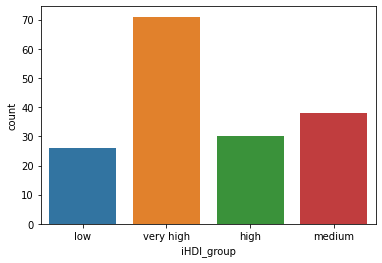

In [9]:
sns.countplot(x=data_hdi['iHDI_group'])

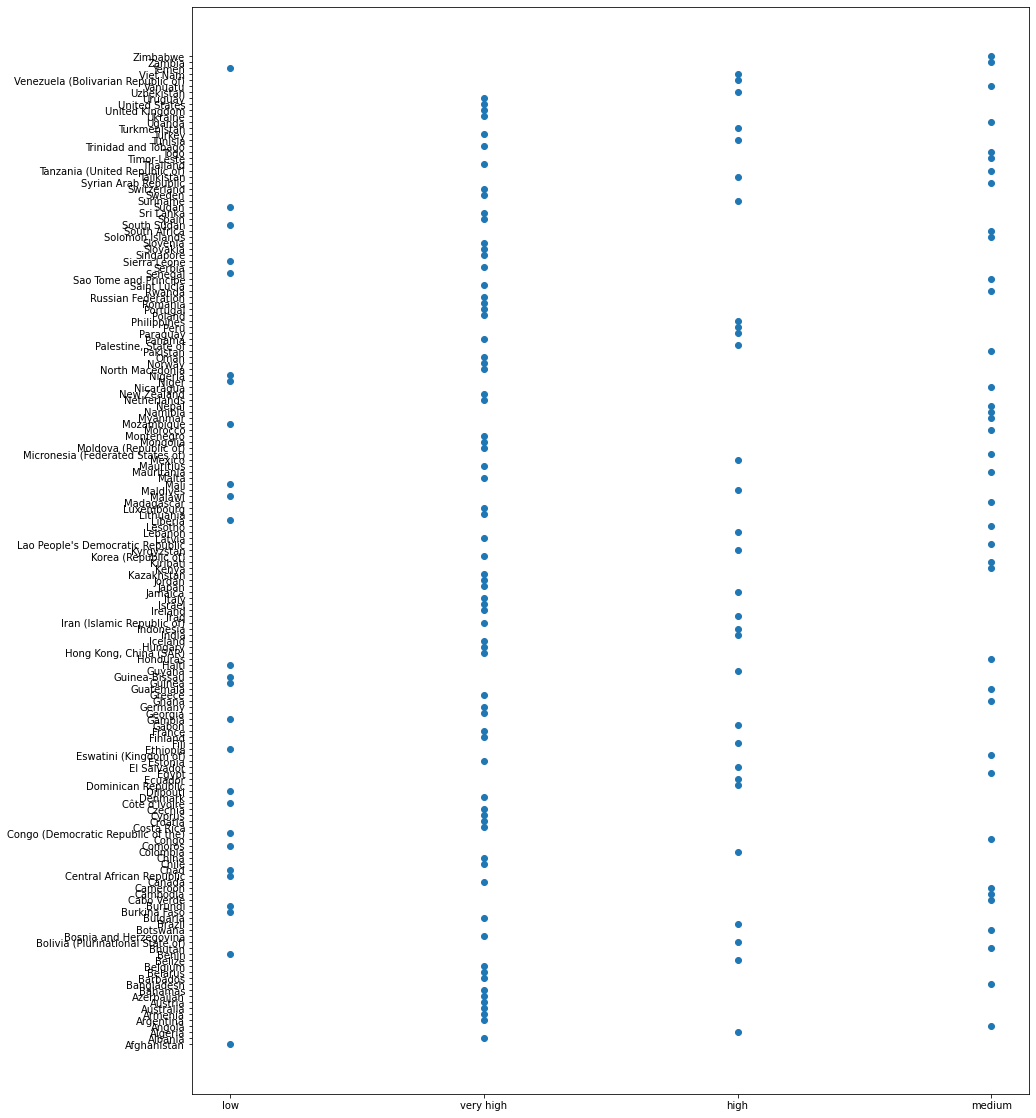

In [10]:
#let's try plotting
plt.figure(figsize=(15,20))
x = data_hdi['iHDI_group']
y=data_hdi['Country']

plt.scatter(x,y)

In [0]:
#Consumer Price Index
data_cpi = pd.read_csv(cpi_monthly)

In [12]:
data_cpi.head()

,ref_area.label,indicator.label,source.label,classif1.label,time,obs_value,note_indicator.label,note_source.label
0,Aruba,"National consumer price index (CPI) by COICOP,...",ABW - CPS - Consumer Price Index,COICOP (Selected categories): General,2018M01,1.06,Frequency: Monthly,Repository: International Monetary Fund
1,Aruba,"National consumer price index (CPI) by COICOP,...",ABW - CPS - Consumer Price Index,COICOP (Selected categories): Food and non-alc...,2018M01,2.21,Frequency: Monthly,Repository: International Monetary Fund
2,Aruba,"National consumer price index (CPI) by COICOP,...",ABW - CPS - Consumer Price Index,COICOP (Selected categories): General,2018M02,2.12,Frequency: Monthly,Repository: International Monetary Fund
3,Aruba,"National consumer price index (CPI) by COICOP,...",ABW - CPS - Consumer Price Index,COICOP (Selected categories): Food and non-alc...,2018M02,10.07,Frequency: Monthly,Repository: International Monetary Fund
4,Aruba,"National consumer price index (CPI) by COICOP,...",ABW - CPS - Consumer Price Index,COICOP (Selected categories): General,2018M03,3.21,Frequency: Monthly,Repository: International Monetary Fund


In [0]:
#dropping columns that may not be needed for analysis.
data_cpi = data_cpi.drop(['indicator.label','source.label','note_source.label'],axis=1)

In [14]:
data_cpi.head()

,ref_area.label,classif1.label,time,obs_value,note_indicator.label
0,Aruba,COICOP (Selected categories): General,2018M01,1.06,Frequency: Monthly
1,Aruba,COICOP (Selected categories): Food and non-alc...,2018M01,2.21,Frequency: Monthly
2,Aruba,COICOP (Selected categories): General,2018M02,2.12,Frequency: Monthly
3,Aruba,COICOP (Selected categories): Food and non-alc...,2018M02,10.07,Frequency: Monthly
4,Aruba,COICOP (Selected categories): General,2018M03,3.21,Frequency: Monthly


In [0]:
#data_cpi['classif1.label'].str.split(':',expand=True)
data_cpi[['classification','category']] = data_cpi['classif1.label'].str.split(':',expand=True)

In [16]:
data_cpi.head()

,ref_area.label,classif1.label,time,obs_value,note_indicator.label,classification,category
0,Aruba,COICOP (Selected categories): General,2018M01,1.06,Frequency: Monthly,COICOP (Selected categories),General
1,Aruba,COICOP (Selected categories): Food and non-alc...,2018M01,2.21,Frequency: Monthly,COICOP (Selected categories),Food and non-alcoholic beverages
2,Aruba,COICOP (Selected categories): General,2018M02,2.12,Frequency: Monthly,COICOP (Selected categories),General
3,Aruba,COICOP (Selected categories): Food and non-alc...,2018M02,10.07,Frequency: Monthly,COICOP (Selected categories),Food and non-alcoholic beverages
4,Aruba,COICOP (Selected categories): General,2018M03,3.21,Frequency: Monthly,COICOP (Selected categories),General


In [0]:
data_cpi[['note_indicator','frequency']] = data_cpi['note_indicator.label'].str.split(':',expand=True)

In [18]:
data_cpi.head()

,ref_area.label,classif1.label,time,obs_value,note_indicator.label,classification,category,note_indicator,frequency
0,Aruba,COICOP (Selected categories): General,2018M01,1.06,Frequency: Monthly,COICOP (Selected categories),General,Frequency,Monthly
1,Aruba,COICOP (Selected categories): Food and non-alc...,2018M01,2.21,Frequency: Monthly,COICOP (Selected categories),Food and non-alcoholic beverages,Frequency,Monthly
2,Aruba,COICOP (Selected categories): General,2018M02,2.12,Frequency: Monthly,COICOP (Selected categories),General,Frequency,Monthly
3,Aruba,COICOP (Selected categories): Food and non-alc...,2018M02,10.07,Frequency: Monthly,COICOP (Selected categories),Food and non-alcoholic beverages,Frequency,Monthly
4,Aruba,COICOP (Selected categories): General,2018M03,3.21,Frequency: Monthly,COICOP (Selected categories),General,Frequency,Monthly


In [0]:
data_cpi = data_cpi.drop(['classif1.label','note_indicator.label','classification','note_indicator'],axis=1)

In [20]:
data_cpi.head()

,ref_area.label,time,obs_value,category,frequency
0,Aruba,2018M01,1.06,General,Monthly
1,Aruba,2018M01,2.21,Food and non-alcoholic beverages,Monthly
2,Aruba,2018M02,2.12,General,Monthly
3,Aruba,2018M02,10.07,Food and non-alcoholic beverages,Monthly
4,Aruba,2018M03,3.21,General,Monthly


In [21]:
data_cpi['time'].value_counts()

2018M03    329
2018M06    329
2018M09    324
2018M01    321
2018M02    321
2018M08    319
2018M04    319
2018M07    319
2018M05    319
2018M12    311
2018M10    308
2018M11    307
2019M03    303
2019M02    297
2019M01    297
2019M06    296
2019M04    293
2019M05    291
2019M07    286
2019M08    276
2019M09    268
2019M10    243
2019M11    235
2019M12    211
2020M01    168
2020M02    120
Name: time, dtype: int64

In [0]:
#data_cpi['time'].str.split('M'), trying to split year and month
data_cpi[['year','month']] = data_cpi['time'].str.split('M', expand= True)

In [0]:
#data_cpi['2018'] = data_cpi['time'].str.contains(pat='2018') 
#data_cpi['2019'] = data_cpi['time'].str.contains(pat='2019') 
#data_cpi['2020'] = data_cpi['time'].str.contains(pat='2020') 

In [24]:
data_cpi.head()

,ref_area.label,time,obs_value,category,frequency,year,month
0,Aruba,2018M01,1.06,General,Monthly,2018,01
1,Aruba,2018M01,2.21,Food and non-alcoholic beverages,Monthly,2018,01
2,Aruba,2018M02,2.12,General,Monthly,2018,02
3,Aruba,2018M02,10.07,Food and non-alcoholic beverages,Monthly,2018,02
4,Aruba,2018M03,3.21,General,Monthly,2018,03


In [25]:
data_cpi.dtypes

ref_area.label     object
time               object
obs_value         float64
category           object
frequency          object
year               object
month              object
dtype: object

In [26]:
data_cpi.head()

,ref_area.label,time,obs_value,category,frequency,year,month
0,Aruba,2018M01,1.06,General,Monthly,2018,01
1,Aruba,2018M01,2.21,Food and non-alcoholic beverages,Monthly,2018,01
2,Aruba,2018M02,2.12,General,Monthly,2018,02
3,Aruba,2018M02,10.07,Food and non-alcoholic beverages,Monthly,2018,02
4,Aruba,2018M03,3.21,General,Monthly,2018,03


In [0]:
data_cpi = data_cpi.drop(['time'],axis=1)

In [28]:
data_cpi.head()

,ref_area.label,obs_value,category,frequency,year,month
0,Aruba,1.06,General,Monthly,2018,01
1,Aruba,2.21,Food and non-alcoholic beverages,Monthly,2018,01
2,Aruba,2.12,General,Monthly,2018,02
3,Aruba,10.07,Food and non-alcoholic beverages,Monthly,2018,02
4,Aruba,3.21,General,Monthly,2018,03


In [29]:
data_cpi.dtypes

ref_area.label     object
obs_value         float64
category           object
frequency          object
year               object
month              object
dtype: object

In [30]:
data_cpi.isnull().sum() #checking null values, looks like it is clean data.

ref_area.label    0
obs_value         0
category          0
frequency         0
year              0
month             0
dtype: int64

In [31]:
data_cpi['frequency'].value_counts() #all the data is monthly.

 Monthly    7410
Name: frequency, dtype: int64

In [0]:
data_cpi.rename(columns={'ref_area.label':'Country'},inplace=True)

In [33]:
data_cpi.head()

,Country,obs_value,category,frequency,year,month
0,Aruba,1.06,General,Monthly,2018,01
1,Aruba,2.21,Food and non-alcoholic beverages,Monthly,2018,01
2,Aruba,2.12,General,Monthly,2018,02
3,Aruba,10.07,Food and non-alcoholic beverages,Monthly,2018,02
4,Aruba,3.21,General,Monthly,2018,03


In [34]:
data_cpi['category'].value_counts()

 General                             3795
 Food and non-alcoholic beverages    3615
Name: category, dtype: int64

In [35]:
data_cpi.groupby(['Country'])['category'].count()

Country
Afghanistan    22
Albania        52
Algeria        50
Angola         24
Anguilla       14
               ..
Uzbekistan     26
Vanuatu        14
Viet Nam       52
Zambia         50
Zimbabwe       16
Name: category, Length: 171, dtype: int64

In [36]:
data_cpi.shape

(7410, 6)

In [37]:
data_hdi.shape

(165, 3)

In [0]:
merge_cpi_hdi = pd.merge(data_cpi,data_hdi,on='Country')

In [39]:
merge_cpi_hdi.head(15)

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group
0,Afghanistan,4.28,General,Monthly,2018,01,0.347,low
1,Afghanistan,5.54,Food and non-alcoholic beverages,Monthly,2018,01,0.347,low
2,Afghanistan,3.55,General,Monthly,2018,02,0.347,low
3,Afghanistan,4.36,Food and non-alcoholic beverages,Monthly,2018,02,0.347,low
4,Afghanistan,0.18,General,Monthly,2018,03,0.347,low
5,Afghanistan,-1.62,Food and non-alcoholic beverages,Monthly,2018,03,0.347,low
6,Afghanistan,-0.47,General,Monthly,2018,04,0.347,low
7,Afghanistan,-2.56,Food and non-alcoholic beverages,Monthly,2018,04,0.347,low
8,Afghanistan,-1.05,General,Monthly,2018,05,0.347,low
9,Afghanistan,-3.63,Food and non-alcoholic beverages,Monthly,2018,05,0.347,low


In [40]:
merge_cpi_hdi['month'].value_counts() #not all months have data for countries.

01    661
02    624
03    516
06    511
04    504
05    502
07    499
08    489
09    483
10    464
11    455
12    439
Name: month, dtype: int64

In [41]:
merge_cpi_hdi.groupby(['year','Country','category'])['obs_value'].count()

year  Country      category                         
2018  Afghanistan   Food and non-alcoholic beverages    11
                    General                             11
      Albania       Food and non-alcoholic beverages    12
                    General                             12
      Algeria       Food and non-alcoholic beverages    12
                                                        ..
2020  Uzbekistan    General                              2
      Viet Nam      Food and non-alcoholic beverages     2
                    General                              2
      Zambia        Food and non-alcoholic beverages     1
                    General                              1
Name: obs_value, Length: 673, dtype: int64

In [42]:
merge_cpi_hdi.shape

(6147, 8)

In [43]:
merge_cpi_hdi.isnull().sum()

Country       0
obs_value     0
category      0
frequency     0
year          0
month         0
iHDI_index    0
iHDI_group    0
dtype: int64

In [44]:
merge_cpi_hdi.groupby(['iHDI_group','Country'])['category'].count()

iHDI_group  Country           
high        Algeria               50
            Belize                50
            Brazil                26
            Colombia              52
            Dominican Republic    52
                                  ..
very high   Turkey                51
            Ukraine               52
            United Kingdom        50
            United States         52
            Uruguay               52
Name: category, Length: 138, dtype: int64

In [45]:
merge_cpi_hdi.head(20)

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group
0,Afghanistan,4.28,General,Monthly,2018,01,0.347,low
1,Afghanistan,5.54,Food and non-alcoholic beverages,Monthly,2018,01,0.347,low
2,Afghanistan,3.55,General,Monthly,2018,02,0.347,low
3,Afghanistan,4.36,Food and non-alcoholic beverages,Monthly,2018,02,0.347,low
4,Afghanistan,0.18,General,Monthly,2018,03,0.347,low
5,Afghanistan,-1.62,Food and non-alcoholic beverages,Monthly,2018,03,0.347,low
6,Afghanistan,-0.47,General,Monthly,2018,04,0.347,low
7,Afghanistan,-2.56,Food and non-alcoholic beverages,Monthly,2018,04,0.347,low
8,Afghanistan,-1.05,General,Monthly,2018,05,0.347,low
9,Afghanistan,-3.63,Food and non-alcoholic beverages,Monthly,2018,05,0.347,low


In [0]:
backup_merge = merge_cpi_hdi.copy() #taking a backup copy

In [0]:
label_encoder = preprocessing.LabelEncoder()

In [0]:
merge_cpi_hdi['Country']= label_encoder.fit_transform(merge_cpi_hdi['Country']) 

In [49]:
merge_cpi_hdi.head()

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group
0,0,4.28,General,Monthly,2018,01,0.347,low
1,0,5.54,Food and non-alcoholic beverages,Monthly,2018,01,0.347,low
2,0,3.55,General,Monthly,2018,02,0.347,low
3,0,4.36,Food and non-alcoholic beverages,Monthly,2018,02,0.347,low
4,0,0.18,General,Monthly,2018,03,0.347,low


In [0]:
#will use get dummies for category, year and label encoding for HDI group.
merge_cpi_hdi['iHDI_group']= label_encoder.fit_transform(merge_cpi_hdi['iHDI_group']) 

In [51]:
merge_cpi_hdi.head()

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group
0,0,4.28,General,Monthly,2018,01,0.347,1
1,0,5.54,Food and non-alcoholic beverages,Monthly,2018,01,0.347,1
2,0,3.55,General,Monthly,2018,02,0.347,1
3,0,4.36,Food and non-alcoholic beverages,Monthly,2018,02,0.347,1
4,0,0.18,General,Monthly,2018,03,0.347,1


In [0]:
merge_cpi_hdi = pd.concat([merge_cpi_hdi,pd.get_dummies(merge_cpi_hdi['category'], prefix='category')],axis=1)

In [53]:
merge_cpi_hdi.head()

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group,category_ Food and non-alcoholic beverages,category_ General
0,0,4.28,General,Monthly,2018,01,0.347,1,0,1
1,0,5.54,Food and non-alcoholic beverages,Monthly,2018,01,0.347,1,1,0
2,0,3.55,General,Monthly,2018,02,0.347,1,0,1
3,0,4.36,Food and non-alcoholic beverages,Monthly,2018,02,0.347,1,1,0
4,0,0.18,General,Monthly,2018,03,0.347,1,0,1


In [0]:
merge_cpi_hdi.drop(['category'],axis=1, inplace=True)

In [0]:
merge_cpi_hdi = pd.concat([merge_cpi_hdi,pd.get_dummies(merge_cpi_hdi['year'], prefix='year')],axis=1)

In [56]:
merge_cpi_hdi.head()

,Country,obs_value,frequency,year,month,iHDI_index,iHDI_group,category_ Food and non-alcoholic beverages,category_ General,year_2018,year_2019,year_2020
0,0,4.28,Monthly,2018,01,0.347,1,0,1,1,0,0
1,0,5.54,Monthly,2018,01,0.347,1,1,0,1,0,0
2,0,3.55,Monthly,2018,02,0.347,1,0,1,1,0,0
3,0,4.36,Monthly,2018,02,0.347,1,1,0,1,0,0
4,0,0.18,Monthly,2018,03,0.347,1,0,1,1,0,0


In [0]:
merge_cpi_hdi.drop(['year'],axis=1, inplace=True)

In [0]:
#dropping frequency column since we know frequency is monthly
merge_cpi_hdi.drop(['frequency'],axis=1, inplace=True)

In [59]:
merge_cpi_hdi.head()

,Country,obs_value,month,iHDI_index,iHDI_group,category_ Food and non-alcoholic beverages,category_ General,year_2018,year_2019,year_2020
0,0,4.28,01,0.347,1,0,1,1,0,0
1,0,5.54,01,0.347,1,1,0,1,0,0
2,0,3.55,02,0.347,1,0,1,1,0,0
3,0,4.36,02,0.347,1,1,0,1,0,0
4,0,0.18,03,0.347,1,0,1,1,0,0


In [0]:
#taking a backup copy
backup = merge_cpi_hdi.copy()

In [61]:
backup.head()

,Country,obs_value,month,iHDI_index,iHDI_group,category_ Food and non-alcoholic beverages,category_ General,year_2018,year_2019,year_2020
0,0,4.28,01,0.347,1,0,1,1,0,0
1,0,5.54,01,0.347,1,1,0,1,0,0
2,0,3.55,02,0.347,1,0,1,1,0,0
3,0,4.36,02,0.347,1,1,0,1,0,0
4,0,0.18,03,0.347,1,0,1,1,0,0


In [0]:
data = backup.corr()

In [63]:
data

,Country,obs_value,iHDI_index,iHDI_group,category_ Food and non-alcoholic beverages,category_ General,year_2018,year_2019,year_2020
Country,1.000000,0.000012,0.005414,0.083762,-0.001892,0.001892,-0.025428,0.024585,0.002374
obs_value,0.000012,1.000000,-0.139802,-0.014727,-0.003351,0.003351,0.012045,-0.014065,0.004768
iHDI_index,0.005414,-0.139802,1.000000,0.588538,-0.005933,0.005933,-0.082934,0.046697,0.089304
iHDI_group,0.083762,-0.014727,0.588538,1.000000,0.018805,-0.018805,-0.034337,0.017129,0.042345
category_ Food and non-alcoholic beverages,-0.001892,-0.003351,-0.005933,0.018805,1.000000,-1.000000,0.006028,-0.004713,-0.003278
category_ General,0.001892,0.003351,0.005933,-0.018805,-1.000000,1.000000,-0.006028,0.004713,0.003278
year_2018,-0.025428,0.012045,-0.082934,-0.034337,0.006028,-0.006028,1.000000,-0.916168,-0.216764
year_2019,0.024585,-0.014065,0.046697,0.017129,-0.004713,0.004713,-0.916168,1.000000,-0.192673
year_2020,0.002374,0.004768,0.089304,0.042345,-0.003278,0.003278,-0.216764,-0.192673,1.000000


In [64]:
data['iHDI_group'].sort_values() #correlation with the iHDI_group our label would be obs_value which has very little significance.

year_2018                                    -0.034337
category_ General                            -0.018805
obs_value                                    -0.014727
year_2019                                     0.017129
category_ Food and non-alcoholic beverages    0.018805
year_2020                                     0.042345
Country                                       0.083762
iHDI_index                                    0.588538
iHDI_group                                    1.000000
Name: iHDI_group, dtype: float64

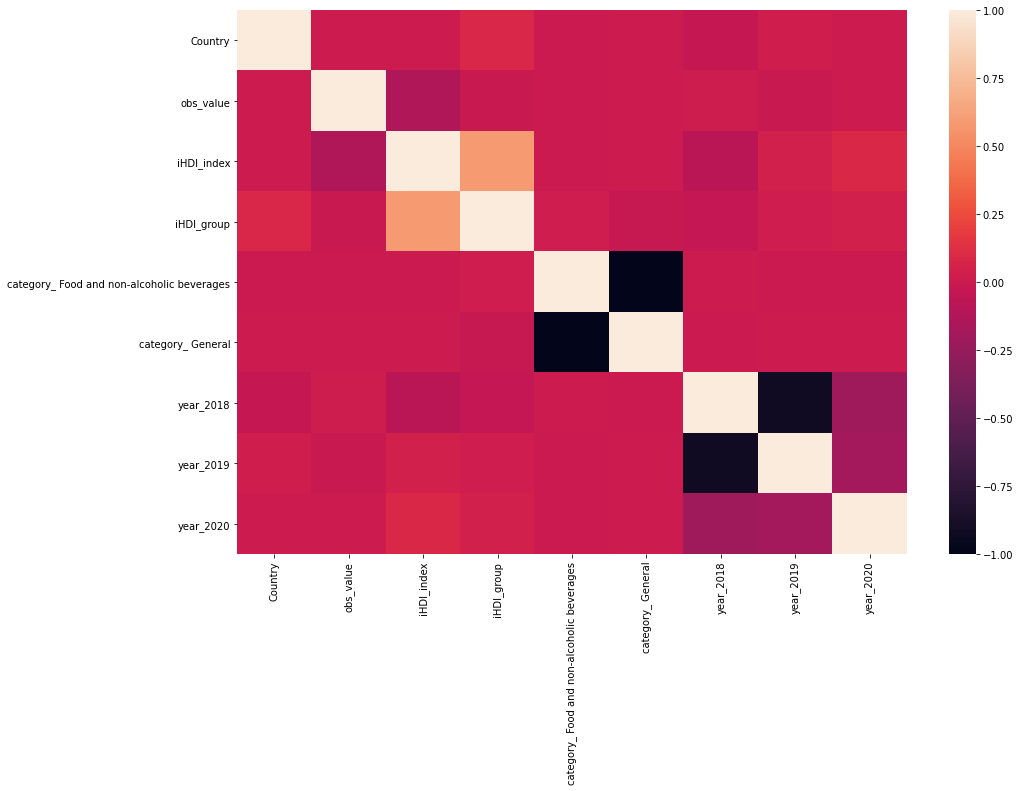

In [65]:
plt.figure(figsize=(15,10))

sns.heatmap(data)

In [0]:
data_bank_lend = pd.read_csv(bank_lending_rate)

In [67]:
data_bank_lend.head(10)

,Country,Last,timestamp,Q2/20,Q3/20,Q4/20,Q1/21
0,Albania,4.39,Dec/19,4.39,4.39,4.39,4.39
1,Angola,19.76,Nov/19,19.76,19.76,19.76,19.76
2,Australia,7.92,Feb/20,7.92,7.92,7.92,7.92
3,Austria,1.71,Feb/20,1.67,1.67,1.67,1.67
4,Bahamas,10.43,Jan/20,9.93,9.93,9.93,9.93
5,Bahrain,4.98,Sep/19,4.73,4.73,4.73,4.73
6,Belgium,1.55,Feb/20,1.57,1.57,1.57,1.57
7,Bolivia,6.11,Dec/19,5.54,5.34,5.14,5.24
8,Botswana,6.25,Jan/20,6.25,6.25,6.25,6.25
9,Brazil,46.67,Feb/20,46.67,46.67,46.67,47.17


In [68]:
data_bank_lend.dtypes

Country       object
Last         float64
timestamp     object
Q2/20        float64
Q3/20        float64
Q4/20        float64
Q1/21        float64
dtype: object

In [69]:
merge_cpi_hdi.dtypes

Country                                         int64
obs_value                                     float64
month                                          object
iHDI_index                                    float64
iHDI_group                                      int64
category_ Food and non-alcoholic beverages      uint8
category_ General                               uint8
year_2018                                       uint8
year_2019                                       uint8
year_2020                                       uint8
dtype: object

In [0]:
data_bank_lend[['lending_rate_month','lending_rate_year']] = data_bank_lend['timestamp'].str.split('/',expand=True)

In [71]:
data_bank_lend.head()

,Country,Last,timestamp,Q2/20,Q3/20,Q4/20,Q1/21,lending_rate_month,lending_rate_year
0,Albania,4.39,Dec/19,4.39,4.39,4.39,4.39,Dec,19
1,Angola,19.76,Nov/19,19.76,19.76,19.76,19.76,Nov,19
2,Australia,7.92,Feb/20,7.92,7.92,7.92,7.92,Feb,20
3,Austria,1.71,Feb/20,1.67,1.67,1.67,1.67,Feb,20
4,Bahamas,10.43,Jan/20,9.93,9.93,9.93,9.93,Jan,20


In [0]:
data_bank_lend.rename(columns={'Last':'Lending Rate'},inplace=True)

In [0]:
data_bank_lend.lending_rate_year = data_bank_lend.lending_rate_year.apply(lambda x: '2019' if '19' in x else '2020')

In [74]:
data_bank_lend.head()

,Country,Lending Rate,timestamp,Q2/20,Q3/20,Q4/20,Q1/21,lending_rate_month,lending_rate_year
0,Albania,4.39,Dec/19,4.39,4.39,4.39,4.39,Dec,2019
1,Angola,19.76,Nov/19,19.76,19.76,19.76,19.76,Nov,2019
2,Australia,7.92,Feb/20,7.92,7.92,7.92,7.92,Feb,2020
3,Austria,1.71,Feb/20,1.67,1.67,1.67,1.67,Feb,2020
4,Bahamas,10.43,Jan/20,9.93,9.93,9.93,9.93,Jan,2020


In [0]:
bank_lend = data_bank_lend.drop(['timestamp','Q2/20','Q3/20','Q4/20','Q1/21'],axis=1)

In [76]:
bank_lend.head()

,Country,Lending Rate,lending_rate_month,lending_rate_year
0,Albania,4.39,Dec,2019
1,Angola,19.76,Nov,2019
2,Australia,7.92,Feb,2020
3,Austria,1.71,Feb,2020
4,Bahamas,10.43,Jan,2020


In [77]:
backup.dtypes

Country                                         int64
obs_value                                     float64
month                                          object
iHDI_index                                    float64
iHDI_group                                      int64
category_ Food and non-alcoholic beverages      uint8
category_ General                               uint8
year_2018                                       uint8
year_2019                                       uint8
year_2020                                       uint8
dtype: object

In [0]:
merge_cpi_hdi_lend = pd.merge(backup_merge,bank_lend,on='Country')

In [79]:
merge_cpi_hdi_lend.head()

,Country,obs_value,category,frequency,year,month,iHDI_index,iHDI_group,Lending Rate,lending_rate_month,lending_rate_year
0,Angola,25.15,General,Monthly,2018,01,0.392,medium,19.76,Nov,2019
1,Angola,18.69,Food and non-alcoholic beverages,Monthly,2018,01,0.392,medium,19.76,Nov,2019
2,Angola,23.36,General,Monthly,2018,02,0.392,medium,19.76,Nov,2019
3,Angola,17.49,Food and non-alcoholic beverages,Monthly,2018,02,0.392,medium,19.76,Nov,2019
4,Angola,22.32,General,Monthly,2018,03,0.392,medium,19.76,Nov,2019


In [0]:
merge_cpi_hdi_lend=   merge_cpi_hdi_lend.drop('frequency',axis=1)

In [81]:
merge_cpi_hdi_lend.head()

,Country,obs_value,category,year,month,iHDI_index,iHDI_group,Lending Rate,lending_rate_month,lending_rate_year
0,Angola,25.15,General,2018,01,0.392,medium,19.76,Nov,2019
1,Angola,18.69,Food and non-alcoholic beverages,2018,01,0.392,medium,19.76,Nov,2019
2,Angola,23.36,General,2018,02,0.392,medium,19.76,Nov,2019
3,Angola,17.49,Food and non-alcoholic beverages,2018,02,0.392,medium,19.76,Nov,2019
4,Angola,22.32,General,2018,03,0.392,medium,19.76,Nov,2019


In [0]:
merge_cpi_hdi_lend=merge_cpi_hdi_lend.reindex(columns= ['Country', 'iHDI_index','iHDI_group','category','obs_value','month','year','Lending Rate','lending_rate_month','lending_rate_year'])

In [83]:
merge_cpi_hdi_lend.head()

,Country,iHDI_index,iHDI_group,category,obs_value,month,year,Lending Rate,lending_rate_month,lending_rate_year
0,Angola,0.392,medium,General,25.15,01,2018,19.76,Nov,2019
1,Angola,0.392,medium,Food and non-alcoholic beverages,18.69,01,2018,19.76,Nov,2019
2,Angola,0.392,medium,General,23.36,02,2018,19.76,Nov,2019
3,Angola,0.392,medium,Food and non-alcoholic beverages,17.49,02,2018,19.76,Nov,2019
4,Angola,0.392,medium,General,22.32,03,2018,19.76,Nov,2019


In [0]:
#One hot encoding of category
merge_cpi_hdi_lend = pd.concat([merge_cpi_hdi_lend,pd.get_dummies(merge_cpi_hdi_lend['category'], prefix='category')],axis=1)

In [87]:
merge_cpi_hdi_lend.head()

,Country,iHDI_index,iHDI_group,category,obs_value,month,year,Lending Rate,lending_rate_month,lending_rate_year,category_ Food and non-alcoholic beverages,category_ General
0,Angola,0.392,medium,General,25.15,01,2018,19.76,Nov,2019,0,1
1,Angola,0.392,medium,Food and non-alcoholic beverages,18.69,01,2018,19.76,Nov,2019,1,0
2,Angola,0.392,medium,General,23.36,02,2018,19.76,Nov,2019,0,1
3,Angola,0.392,medium,Food and non-alcoholic beverages,17.49,02,2018,19.76,Nov,2019,1,0
4,Angola,0.392,medium,General,22.32,03,2018,19.76,Nov,2019,0,1


In [93]:
merge_cpi_hdi_lend.dtypes

Country                                        object
iHDI_index                                    float64
iHDI_group                                     object
category                                       object
obs_value                                     float64
month                                           int64
year                                            int64
Lending Rate                                  float64
lending_rate_month                             object
lending_rate_year                              object
category_ Food and non-alcoholic beverages      uint8
category_ General                               uint8
dtype: object

In [0]:
merge_cpi_hdi_lend['month'] = merge_cpi_hdi_lend['month'].astype(int)
merge_cpi_hdi_lend['year'] = merge_cpi_hdi_lend['year'].astype(int)

In [0]:
backup_1 = merge_cpi_hdi_lend.copy()

In [0]:
label_encoder = preprocessing.LabelEncoder()

In [0]:
#need to label encode and do one Hot encoding.
#label encoding of country, iHDI group, lending rate month because want it in numbers.
merge_cpi_hdi_lend['Country']= label_encoder.fit_transform(merge_cpi_hdi_lend['Country']) 
merge_cpi_hdi_lend['iHDI_group']= label_encoder.fit_transform(merge_cpi_hdi_lend['iHDI_group'])
merge_cpi_hdi_lend['lending_rate_month']= label_encoder.fit_transform(merge_cpi_hdi_lend['lending_rate_month'])

In [98]:
merge_cpi_hdi_lend.head()

,Country,iHDI_index,iHDI_group,category,obs_value,month,year,Lending Rate,lending_rate_month,lending_rate_year,category_ Food and non-alcoholic beverages,category_ General
0,1,0.392,2,General,25.15,1,2018,19.76,5,2019,0,1
1,1,0.392,2,Food and non-alcoholic beverages,18.69,1,2018,19.76,5,2019,1,0
2,1,0.392,2,General,23.36,2,2018,19.76,5,2019,0,1
3,1,0.392,2,Food and non-alcoholic beverages,17.49,2,2018,19.76,5,2019,1,0
4,1,0.392,2,General,22.32,3,2018,19.76,5,2019,0,1


In [0]:
merge_cpi_hdi_lend= merge_cpi_hdi_lend.drop('category',axis=1)

In [101]:
merge_cpi_hdi_lend.head()

,Country,iHDI_index,iHDI_group,obs_value,month,year,Lending Rate,lending_rate_month,lending_rate_year,category_ Food and non-alcoholic beverages,category_ General
0,1,0.392,2,25.15,1,2018,19.76,5,2019,0,1
1,1,0.392,2,18.69,1,2018,19.76,5,2019,1,0
2,1,0.392,2,23.36,2,2018,19.76,5,2019,0,1
3,1,0.392,2,17.49,2,2018,19.76,5,2019,1,0
4,1,0.392,2,22.32,3,2018,19.76,5,2019,0,1


In [0]:
data_bl = merge_cpi_hdi_lend.corr()

In [104]:
data_bl

,Country,iHDI_index,iHDI_group,obs_value,month,year,Lending Rate,lending_rate_month,category_ Food and non-alcoholic beverages,category_ General
Country,1.000000,-0.004151,-0.013541,-0.043706,-0.005157,0.004982,-0.080607,0.151317,0.022696,-0.022696
iHDI_index,-0.004151,1.000000,0.650483,-0.540584,0.020481,0.133581,-0.595407,-0.036438,0.043594,-0.043594
iHDI_group,-0.013541,0.650483,1.000000,-0.313248,0.013899,0.092004,-0.484029,0.089430,0.075042,-0.075042
obs_value,-0.043706,-0.540584,-0.313248,1.000000,-0.018764,-0.120333,0.417831,0.053716,-0.040932,0.040932
month,-0.005157,0.020481,0.013899,-0.018764,1.000000,-0.202649,0.000272,0.004512,-0.002407,0.002407
year,0.004982,0.133581,0.092004,-0.120333,-0.202649,1.000000,-0.077657,-0.044392,-0.013132,0.013132
Lending Rate,-0.080607,-0.595407,-0.484029,0.417831,0.000272,-0.077657,1.000000,0.051880,-0.080178,0.080178
lending_rate_month,0.151317,-0.036438,0.089430,0.053716,0.004512,-0.044392,0.051880,1.000000,0.015018,-0.015018
category_ Food and non-alcoholic beverages,0.022696,0.043594,0.075042,-0.040932,-0.002407,-0.013132,-0.080178,0.015018,1.000000,-1.000000
category_ General,-0.022696,-0.043594,-0.075042,0.040932,0.002407,0.013132,0.080178,-0.015018,-1.000000,1.000000


In [105]:
data_bl['iHDI_group'].sort_values()

Lending Rate                                 -0.484029
obs_value                                    -0.313248
category_ General                            -0.075042
Country                                      -0.013541
month                                         0.013899
category_ Food and non-alcoholic beverages    0.075042
lending_rate_month                            0.089430
year                                          0.092004
iHDI_index                                    0.650483
iHDI_group                                    1.000000
Name: iHDI_group, dtype: float64

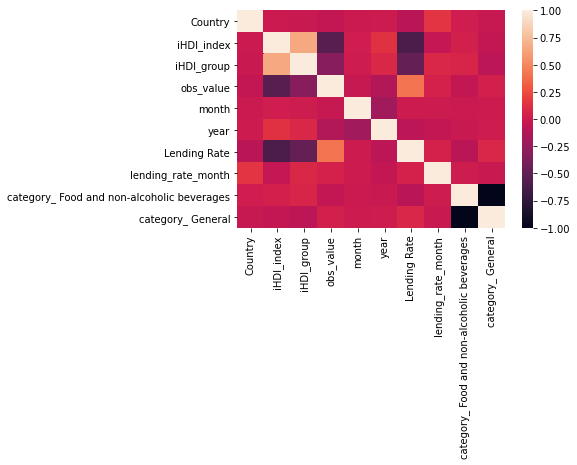

In [103]:
sns.heatmap(data_bl)

In [106]:
data_bl['Lending Rate'].sort_values() #looks like Lending rate and cpi monthly (obs_value) have a negative correlation.

iHDI_index                                   -0.595407
iHDI_group                                   -0.484029
Country                                      -0.080607
category_ Food and non-alcoholic beverages   -0.080178
year                                         -0.077657
month                                         0.000272
lending_rate_month                            0.051880
category_ General                             0.080178
obs_value                                     0.417831
Lending Rate                                  1.000000
Name: Lending Rate, dtype: float64